In [2]:
import numpy as np  # type: ignore
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("D:/sakshi/data science/advertising.csv")

In [4]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
x=df.iloc[:,:-3]
y=df["Sales"]

In [11]:
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [12]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred =lr.predict(x_test)
y_pred


array([10.92912965,  9.88399105, 12.08313684, 22.93189318, 16.42699412,
       10.22148373,  7.63585439, 20.23195181,  8.45781235, 17.91849399,
       21.38595901, 11.90894708, 15.68668762, 17.38503783, 11.32105662,
       13.70527904, 21.62002651,  7.20037998, 11.22851831, 18.77855596,
       22.81758114, 14.7994085 , 16.6937222 , 14.33127351, 10.07451111,
       13.86313851, 16.17659633, 18.32130782, 19.35555956,  8.52857694,
       10.85292163, 17.98925858, 22.44198446, 20.3190467 ,  7.88080875,
        8.18019741, 10.40656035, 17.00399772, 10.88558221,  8.52313351])

Text(0.5, 1.0, 'Distribution of salary vs experience')

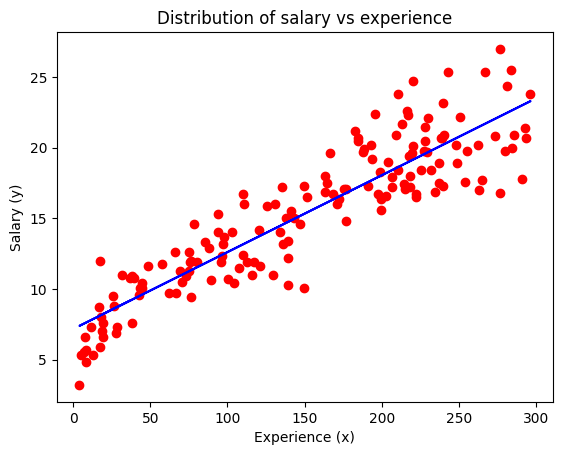

In [16]:
plt.scatter(x_train,y_train, color='red')
plt.plot(x_train, lr.predict(x_train), color='blue')
plt.xlabel('Experience (x)')
plt.ylabel('Salary (y)')
plt.title('Distribution of salary vs experience')

Text(0.5, 1.0, 'Distribution of salary vs experiance')

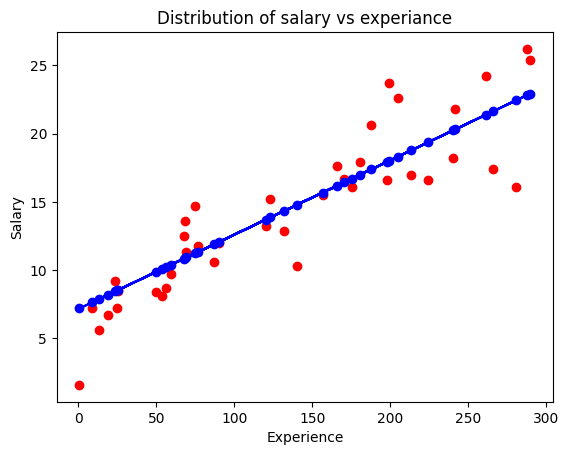

In [17]:
plt.scatter(x_test,y_test,color="red")
plt.plot(x_test,lr.predict(x_test),color="blue",marker="o")
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.ylabel('Salary')
plt.title('Distribution of salary vs experiance')

In [18]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mse

6.639091226559296

In [19]:
r2 = r2_score(y_test,y_pred)
r2

0.8010943934328408

In [20]:
x= df.iloc[:,:-1]
y=df.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train =sc.fit_transform(x_train)
x_test =sc.transform(x_test)

In [24]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(x_test)
y_pred

array([10.70988945,  8.68629773,  9.5778695 , 24.86207988, 14.65584473,
        8.3214275 , 10.43048002, 18.4453765 ,  9.73394291, 17.9290798 ,
       23.369886  , 10.67916356, 13.44032325, 17.17416235, 11.77380187,
       13.37072678, 21.26009906,  9.19666875, 14.13201846, 18.9260716 ,
       24.75507991, 12.48481182, 16.57130583, 13.77344772,  7.79299106,
       15.19648316, 14.71607944, 20.73862119, 17.01041859,  8.83474391,
       12.09424377, 20.74886454, 21.26147987, 21.90420095,  7.08087067,
        7.04431681,  9.15949871, 15.47796148, 13.28282334,  7.23769883])

In [28]:
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(y_test,y_pred)
mse


4.522552562041289

In [33]:
r2 = r2_score(y_test,y_pred)
r2

0.8645053923967725